# House Price Prediction using Machine Learning

## Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load dataset and Exploratory Data Analysis

In [2]:
df = pd.read_csv('Bengaluru_House_Dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.shape

(13320, 9)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
16-Jul               1
14-Jul               1
15-Dec               1
17-Jan               1
Name: availability, Length: 81, dtype: int64

In [8]:
df['location'].value_counts()

Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Sarvobhogam Nagar                       1
Kirloskar layout, Basaveshwarnagar      1
Huttanahalli                            1
Nirman Layout                           1
T R Mill Road                           1
Name: location, Length: 1305, dtype: int64

In [9]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
16 BHK           1
12 Bedroom       1
18 Bedroom       1
14 BHK           1
19 BHK           1
27 BHK           1
43 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [10]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [11]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

### Drop some features (columns) which are of no use to train our model. 
### The features which we are going to drop are availability, area_type, society, balcony.

In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
df.drop(columns=["availability","area_type","society","balcony"],axis=1,inplace=True)

In [14]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Preprocessing the dataset

### find the null values

In [15]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### handling null values

In [16]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [17]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [18]:
df['size'] = df['size'].fillna(df['size'].mode()[0])

In [19]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Check the unique values of size feature

In [20]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [21]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### extract only the starting integer values from the size feature and store it into a new bhk feature 

In [22]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


### drop size feature which is of no use

In [24]:
df.drop(columns=["size"],axis=1,inplace=True)

In [25]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


## Removing Outliers

### Finding BHK greater than 22

In [26]:
df[df.bhk>22]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


### Check the unique values of total_sqrft

In [27]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### taking all floating values and returning its range

In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.00000,186.000,4
56,Devanahalli,3010 - 3410,2.69261,192.000,4
81,Hennur Road,2957 - 3450,2.69261,224.500,4
122,Hebbal,3067 - 8156,4.00000,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.00000,54.005,2
165,Sarjapur,1145 - 1340,2.00000,43.490,2
188,KR Puram,1015 - 1540,2.00000,56.800,2
224,Devanahalli,1520 - 1740,2.69261,74.820,3
410,Kengeri,34.46Sq. Meter,1.00000,18.500,1
549,Hennur Road,1195 - 1440,2.00000,63.770,2


### convert into float

In [30]:
def convert_sqft_into_number(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [31]:
df1 = df.copy()

df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_into_number)

In [32]:
df1.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

### create a new feature price_per_sqft from the existing feature price and total_sqft

In [33]:
df2 = df1.copy()

In [34]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


### remove outliers from the bhk features, all bhk removed from where total_sqft/bhk less than 300.


In [35]:
df2[ (df2.total_sqft / df2.bhk < 300) ].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,100.0,3,20000.000000


In [36]:
df3 = df2[ ~(df2.total_sqft / df2.bhk < 300) ]
df3.shape

(12576, 6)

In [37]:
df3.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Remove_outlier_from_price_per_sqft()
### Use Standard Deviation technique to remove outliers

In [38]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key,sub in df.groupby('location'):
        m = np.mean( sub.price_per_sqft )
        st = np.std( sub.price_per_sqft )
        reduce_df = sub[( sub.price_per_sqft>(m-st) ) & ( sub.price_per_sqft<=(m+st) ) ]
        df_out = pd.concat( [df_out, reduce_df],ignore_index=True )
    return df_out

In [39]:
df4 = remove_outlier_from_price_per_sqft(df3)
df4.shape

(9317, 6)

In [40]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,9317.00000,9317.000000,9317.000000,9317.000000,9317.000000
mean,1509.78706,2.465966,94.478414,2.561017,5725.947962
std,897.81508,0.949394,110.681830,0.848468,2533.541095
min,300.00000,1.000000,10.000000,1.000000,1250.000000
25%,1110.00000,2.000000,49.000000,2.000000,4259.259259
50%,1290.00000,2.000000,67.000000,2.000000,5188.679245
75%,1650.00000,3.000000,100.000000,3.000000,6405.425772
max,30400.00000,14.000000,2912.000000,10.000000,35000.000000


### Visualizing the  location with 2 bhk and 3 bhk

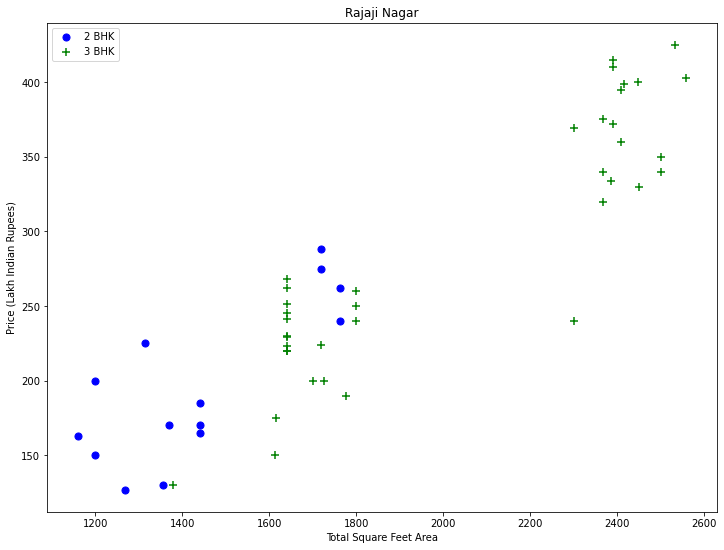

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (12,9)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

### 2 bhk is in blue color and 3 bhk is in green color. In the above graph the 3 bhk house price is less than the 2 bhk house price.

###### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
    
        'mean': 4000,  
        'std: 2000, 
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
###### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

### Use Standard Deviation technique to remove the outliers from the price_per_sqft

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7540, 6)

### Visualize the graph

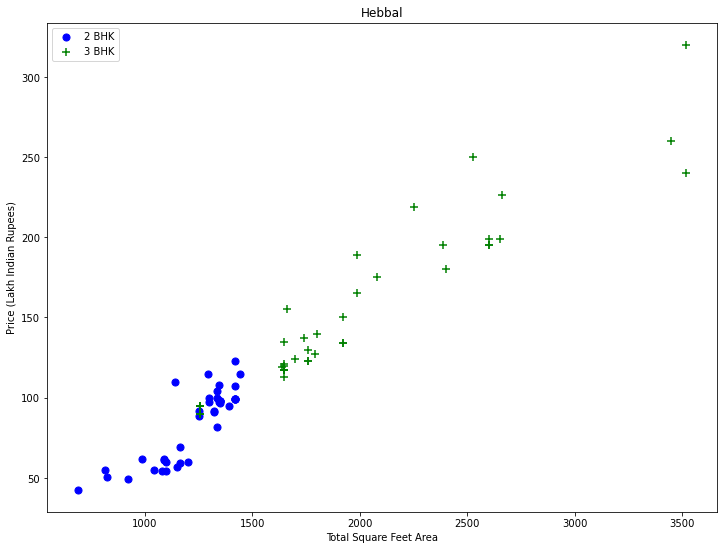

In [43]:
plot_scatter_chart(df5,"Hebbal")

### 3 bhk house price is higher than the 2 bhk house price. Some 3 bhk house prices can be less than the 2 bhk price because of the location. 

### Checking the unique values of the bath and display the houses who have greater than 10 baths.

In [44]:
df5.bath.unique()

array([ 3.        ,  2.        ,  1.        ,  4.        ,  5.        ,
        8.        ,  9.        ,  6.        , 14.        ,  2.69260965,
        7.        , 12.        ])

In [45]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
6219,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

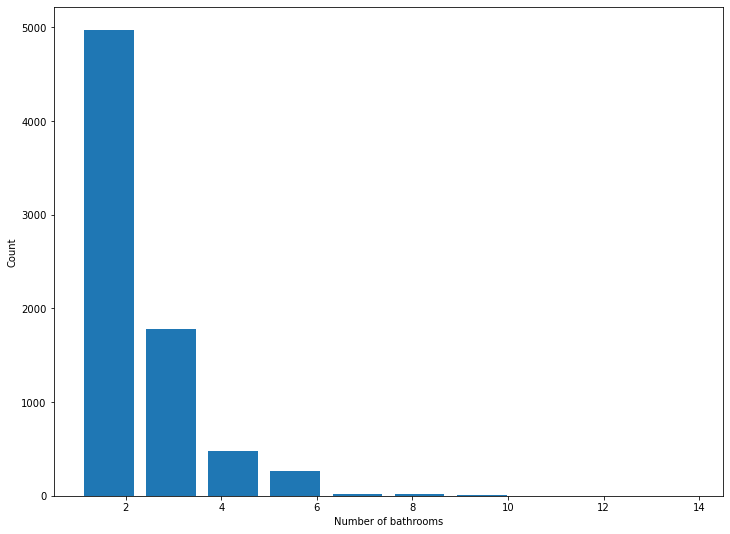

In [46]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

### Keep only those houses who have only less than bhk-10

In [47]:
df5[(df5.bath > df5.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1985,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6153,Nagasandra,7000.0,8.0,450.0,4,6428.571429
7478,Sathya Sai Layout,11338.0,9.0,1000.0,6,8819.897689
7958,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [48]:
df6 = df5[~(df5.bath > df5.bhk+2)]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667


In [49]:
df6.shape

(7535, 6)

### drop a price_per_sqft which is of no use and display the final data

In [50]:
df7 = df6.drop(['price_per_sqft'],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


### Apply a one hot encoding to convert a categorical feature into numeric feature. And store into a “dummies” data set

In [51]:
dummies = pd.get_dummies(df7.location)
dummies.head()

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now concate dummies data set with our final data set and dummies data set

In [52]:
df8 = pd.concat([df7,dummies],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Location feature is of no use. Drop the location and display the final preprocessed data set

In [53]:
df8.drop('location',axis='columns',inplace=True)
df8.head()

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,tc.palya
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df8.shape

(7535, 769)

### Data set is split into the independent and dependent features and stored into the “x” and “y” data set

In [55]:
x = df8.drop('price',axis=1)
y = df8['price']

In [56]:
x.shape

(7535, 768)

In [57]:
y.shape

(7535,)

###  Split the data set into the training and testing using the train_test_split() method which returns 4 data sets

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6028, 768), (1507, 768), (6028,), (1507,))

### Defining linear regression model and training the model using the training data set 

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.816309536773236

# score of other models

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.16919717673357282

In [63]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.7522020585954946

In [64]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7884326699619048

### Testing the model using the testing data set

In [65]:
pred = lr.predict(X_test)
pred

array([285.12632565,  34.80699569,  96.05257336, ...,  63.19342   ,
         5.84732938, 100.20788311])

In [66]:
y_test

5739    325.00
8254     39.50
1810     99.00
3888     40.00
5621     94.99
         ...  
492     140.00
8340     59.00
712      42.00
7141     17.09
3750     98.32
Name: price, Length: 1507, dtype: float64

### Create a function to test the model on a custom data set

In [67]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [68]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

92.11291476017972

In [69]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

86.36790559190969

In [70]:
predict_price('Indira Nagar',1400, 2, 3)

207.07623558037164

In [71]:
predict_price('Indira Nagar',1300,2,3)

199.05434900160037

In [72]:
predict_price('Sarjapur',1495,3,2)

78.6025288422384

In [73]:
predict_price('Kengeri',600,1,1)

18.76221155782941

In [74]:
predict_price('Whitefield',1170,2,2)

69.4965903218803